In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

Using TensorFlow backend.


In [2]:
item = 'Abyssal_whip'

In [3]:
items.getPrices(item)[-10:]

[2663958,
 2643140,
 2626840,
 2614224,
 2606262,
 2593007,
 2593049,
 2587581,
 2581066,
 2581709]

In [4]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Abyssal_whip.png',
 'lowAlch': '48000',
 'examine': 'A weapon from the abyss.',
 'highAlch': '72000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '0.453',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Abyssal_whip',
 'alchable': 'True',
 'exchangePrice': '2622266',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

1286 1295 1286


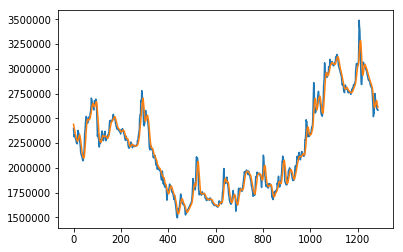

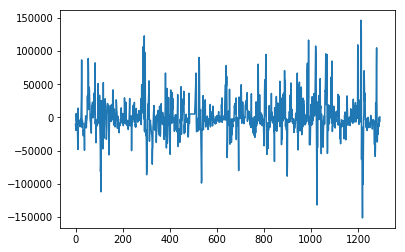

In [5]:
ma = 10
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
print(len(movAvg),len(prices),len(prices[ma-1:]))
plt.plot(prices[ma-1:])
plt.plot(movAvg)
plt.plot()
plt.show()
plt.plot(changes)
plt.show()

In [6]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

[[-0.39886178]
 [-0.59478149]
 [-0.73148709]
 [ 0.21354183]
 [-0.21807331]]


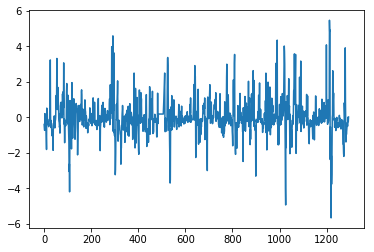

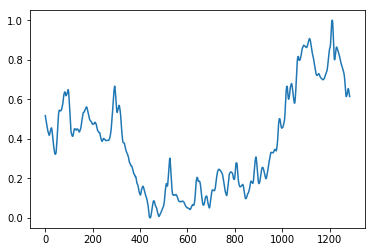

In [7]:
scaler = StandardScaler()
s_changes = scaler.fit_transform(np.array(changes).reshape(-1, 1))
print(s_changes[0:5])
s_movAvg = minMax(movAvg)
plt.plot(s_changes)
plt.show()
plt.plot(s_movAvg)
plt.show()

In [8]:
def classify(d):
    if d>0:
        return 1
    if d<0:
        return 0
    else:
        return .5
        

In [9]:
x = []
y = []
p = []
f_sizes = [5]
size = sum(f_sizes)
for i in range(-1*len(s_changes),-1*size,1):
    x.append([a[0] for a in s_changes[i:i+size]])
    y.append(classify(s_changes[i+size+1]))
    p.append(prices[i+size+1])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
y = keras.utils.to_categorical(y, num_classes=2)

[-0.5947814913458914, -0.7314870851831584, 0.2135418308995593, -0.2180733097526775, -0.23773644311283235] 0
5 5
1289 1289 1289


In [10]:
s1 = int(len(y)*.7)
s2  =int(len(y)*.85)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])

902 902 193 193 194 194 194
5 [-0.39886178 -0.59478149 -0.73148709  0.21354183 -0.21807331]
[1. 0.]
5 [-0.24818599  0.16144389  0.63114933 -0.19181835  0.37032255]
[1. 0.]


In [17]:
model = Sequential()
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
sgd = SGD(lr=0.1)
model.compile(loss='mse',
              optimizer=sgd,
              metrics=['mse'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=30,
            batch_size=16)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Train on 902 samples, validate on 193 samples
Epoch 1/30
902/902 [==============================] - 0s 310us/step - loss: 0.2488 - mean_squared_error: 0.2488 - val_loss: 0.2587 - val_mean_squared_error: 0.2587
Epoch 2/30
902/902 [==============================] - 0s 141us/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 0.2606 - val_mean_squared_error: 0.2606
Epoch 3/30
902/902 [==============================] - 0s 151us/step - loss: 0.2338 - mean_squared_error: 0.2338 - val_loss: 0.2622 - val_mean_squared_error: 0.2622
Epoch 4/30
902/902 [==============================] - 0s 149us/step - loss: 0.2326 - mean_squared_error: 0.2326 - val_loss: 0.2622 - val_mean_squared_error: 0.2622
Epoch 5/30
902/902 [==============================] - 0s 154us/step - loss: 0.2319 - mean_squared_error: 0.2319 - val_loss: 0.2623 - val_mean_squared_error: 0.2623
Epoch 6/30
902/902 [==============================] - 0s 144us/step - loss: 0.2310 - mean_squared_error: 0.2310 - val_loss: 0.2612 - v

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


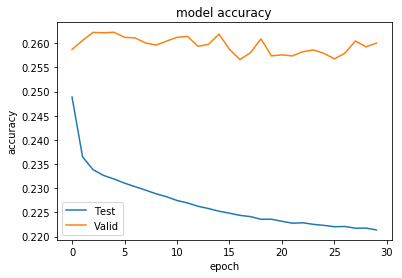

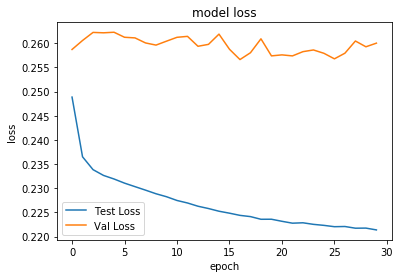

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'],label='Test')
plt.plot(history.history['val_mean_squared_error'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

[[0.43735433 0.5320108 ]
 [0.705529   0.2906661 ]
 [0.55791026 0.44531485]
 [0.6135506  0.3911134 ]
 [0.68414265 0.31522977]]


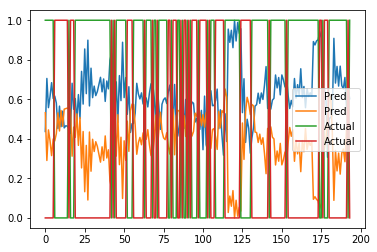

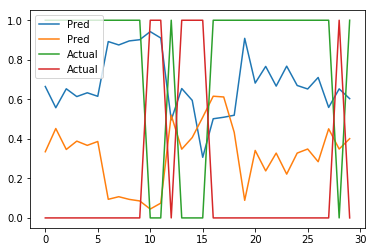

In [16]:
y_pred = model.predict(x_test)
print(y_pred[:5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot(y_pred[-30:],label='Pred')
plt.plot(y_test[-30:],label='Actual')
plt.legend()
plt.show()

In [90]:
bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
ppBest = [([-100],-1)] * len(budgets)
bhBest = [([-100],-1)] * len(budgets)
perBest = [([-100],-1)] * len(budgets)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    for i in range(10):
        mp = ts.modelProfit(x_test,t,model,p_test,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        pp = ts.perfectProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if pp[-1]>ppBest[b][0][-1]:
            ppBest[b] = (pp,t)
        per = ts.persistanceProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if per[-1]>perBest[b][0][-1]:
            perBest[b] = (per,t)
        t += .02

194
100000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [184]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tPerfect\n\t',ppBest[b][0][-1],ppBest[b][1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.146885 0.18
	Perfect
	 1.17309 0.02
	Buy and Hold
	 0.29355
1000000
	Model
	 0.146937 0.18
	Perfect
	 1.174284 0.02
	Buy and Hold
	 0.293778
10000000
	Model
	 0.1961788 0.06
	Perfect
	 0.4853202 0
	Buy and Hold
	 0.0684
100000000
	Model
	 0.02598 0
	Perfect
	 0.0504 0
	Buy and Hold
	 0.00684
1000000000
	Model
	 0.002598 0
	Perfect
	 0.00504 0
	Buy and Hold
	 0.000684


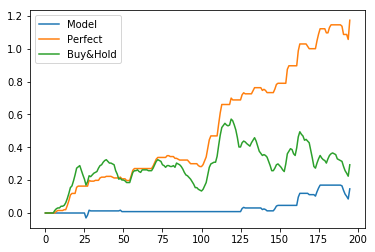

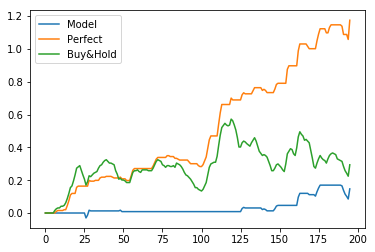

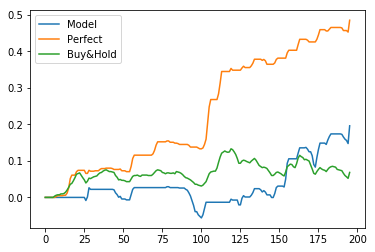

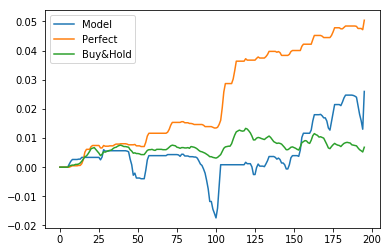

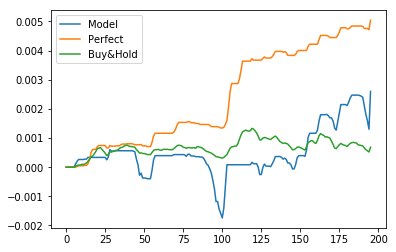

In [185]:
for b in range(len(budgets)):
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(ppBest[b][0],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()